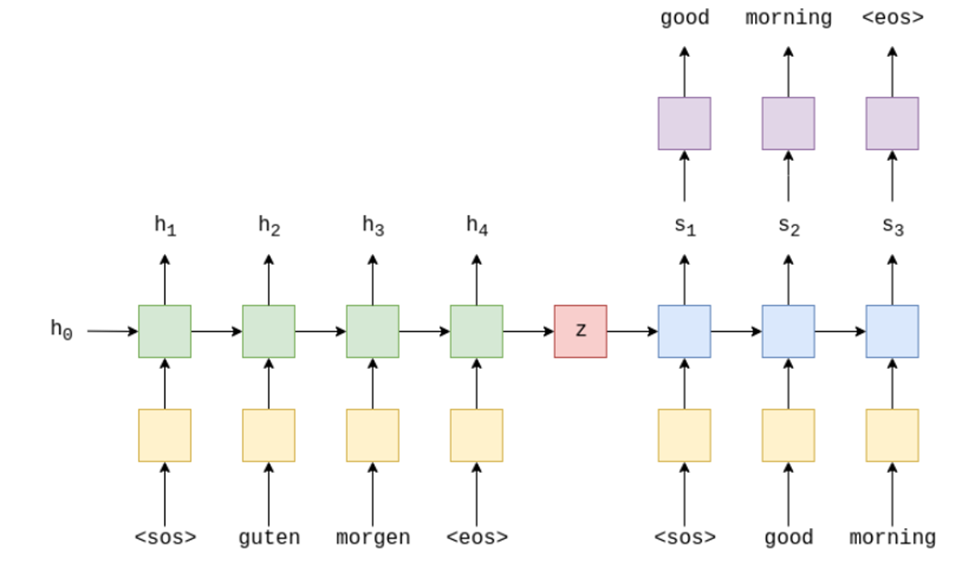

# **WorkFlow**

0. import important libraries
1. prepare your data (spacy)
2. Build a Seq2Seq model
3. Pick a loss function and optimizer
4. training function and evaluate function
5. staring model training
6. test you model

# **0. Import important modules (library)**

In [1]:
!pip install datasets evaluate --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
import numpy as np
import spacy
import datasets
import torchtext
import tqdm
import evaluate

# **1. prepare your data**

1. Loading your data
2. tokenize your data with spacy
3. creating a vocabulary
4. numericalizing our data
5. convert data into tensors
6. creating data loader (batches )

# **1.1 load your datasets**

In [3]:
dataset=datasets.load_dataset("bentrevett/multi30k")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/29000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1014 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['en', 'de'],
        num_rows: 29000
    })
    validation: Dataset({
        features: ['en', 'de'],
        num_rows: 1014
    })
    test: Dataset({
        features: ['en', 'de'],
        num_rows: 1000
    })
})

In [5]:
train_data,valid_data,test_data=(dataset["train"],dataset["validation"],dataset["test"])

In [6]:
train_data

Dataset({
    features: ['en', 'de'],
    num_rows: 29000
})

In [7]:
valid_data


Dataset({
    features: ['en', 'de'],
    num_rows: 1014
})

In [8]:
test_data

Dataset({
    features: ['en', 'de'],
    num_rows: 1000
})

In [9]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.'}

In [10]:
test_data[0]

{'en': 'A man in an orange hat starring at something.',
 'de': 'Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt.'}

# **1.2 Tokenize your data**

Two young, White males are outside near many bushes
**token**<br>
[Two, young, White, males, are, outside, near, many, bushes]

In [11]:
!python -m spacy download en_core_web_sm
!python -m spacy download de_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 54.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
en_nlp=spacy.load("en_core_web_sm")
de_nlp=spacy.load("de_core_news_sm")

In [13]:
string="Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt."

In [14]:
[token.text for token in de_nlp.tokenizer(string)]

['Ein',
 'Mann',
 'mit',
 'einem',
 'orangefarbenen',
 'Hut',
 ',',
 'der',
 'etwas',
 'anstarrt',
 '.']

In [15]:
train_data

Dataset({
    features: ['en', 'de'],
    num_rows: 29000
})

In [16]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.'}

the, The

In [17]:
train_data

Dataset({
    features: ['en', 'de'],
    num_rows: 29000
})

In [18]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.'}

In [19]:
def tokenize_example(example,en_nlp,de_nlp,max_length,lower,sos_token,eos_token):
  en_tokens=[token.text for token in en_nlp.tokenizer(example["en"])][:max_length]
  de_tokens=[token.text  for token in de_nlp.tokenizer(example["de"])] [:max_length]
  if lower:
    en_tokens=[token.lower() for token in en_tokens]
    de_tokens=[token.lower() for token in de_tokens]
  en_tokens=[sos_token] + en_tokens + [eos_token]
  de_tokens=[sos_token] + de_tokens + [eos_token]
  return {"en_tokens" : en_tokens ,"de_tokens" : de_tokens}

In [20]:
max_length=1_000
lower=True
sos_token="<sos>"
eos_token="<eos>"
fn_kwargs={ "en_nlp" :en_nlp,
           "de_nlp" :de_nlp,
            "max_length" : max_length,
            "lower" : lower ,
            "sos_token" : sos_token,
            "eos_token" :eos_token}

In [21]:
train_data=train_data.map(tokenize_example,fn_kwargs=fn_kwargs)
valid_data=valid_data.map(tokenize_example,fn_kwargs=fn_kwargs)
test_data=test_data.map(tokenize_example,fn_kwargs=fn_kwargs)

Map:   0%|          | 0/29000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1014 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [22]:
train_data

Dataset({
    features: ['en', 'de', 'en_tokens', 'de_tokens'],
    num_rows: 29000
})

A man and a little girl a, girl, liitle, and , a

a,< unk>,and,liitle,girl

In [23]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_tokens': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_tokens': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>']}

# **1.3 creating a vocabulary**

In [24]:
min_freq=2
unk_token="<unk>"
pad_token="<pad>"
special_tokens=[unk_token,pad_token,sos_token,eos_token,]
en_vocab=torchtext.vocab.build_vocab_from_iterator(
    train_data["en_tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)
de_vocab=torchtext.vocab.build_vocab_from_iterator(
    train_data["de_tokens"],
    min_freq=min_freq,
    specials=special_tokens,
)

In [25]:
len(en_vocab)

5893

In [26]:
len(de_vocab)

7853

In [27]:
en_vocab.get_itos()[:10]

['<unk>', '<pad>', '<sos>', '<eos>', 'a', '.', 'in', 'the', 'on', 'man']

In [28]:
de_vocab.get_itos()[:10]

['<unk>', '<pad>', '<sos>', '<eos>', '.', 'ein', 'einem', 'in', 'eine', ',']

In [29]:
en_vocab.get_itos()[0]

'<unk>'

In [30]:
en_vocab.get_stoi()["<unk>"]

0

In [31]:
de_vocab.get_stoi()["<unk>"]

0

In [32]:
en_vocab["the"]

7

In [33]:
"chichey diya ki gaal vhdvhjv hbfgh " in en_vocab

False

In [34]:
#en_vocab["kjgvdfvfdviufdvhiufuifbhf"]

In [35]:
assert en_vocab[unk_token] == de_vocab[unk_token]
assert en_vocab[pad_token] == de_vocab[pad_token]
unk_index=en_vocab[unk_token]
pad_index=en_vocab[pad_token]

In [36]:
unk_index

0

In [37]:
pad_index

1

In [38]:
en_vocab.set_default_index(unk_index)
de_vocab.set_default_index(unk_index)

In [39]:
de_vocab["544hg4tyy4"]

0

In [40]:
en_vocab.get_itos()[0]

'<unk>'

In [41]:
tokens=["i" ,"love" ,"watching" ,"crime" ,"sjfegfyudggdvdfdf"]
en_vocab.lookup_indices(tokens)

[956, 2169, 173, 0, 0]

# **1.4 Numericalize data**

In [42]:
train_data

Dataset({
    features: ['en', 'de', 'en_tokens', 'de_tokens'],
    num_rows: 29000
})

In [43]:
train_data[0]["en_tokens"]

['<sos>',
 'two',
 'young',
 ',',
 'white',
 'males',
 'are',
 'outside',
 'near',
 'many',
 'bushes',
 '.',
 '<eos>']

In [44]:
en_vocab.lookup_indices(train_data[100]["en_tokens"])

[2, 357, 34, 6, 4, 31, 67, 45, 8, 18, 74, 2570, 5, 3]

In [45]:
def numericalize_example(example,en_vocab,de_vocab):
  en_ids=en_vocab.lookup_indices(example["en_tokens"])
  de_ids=de_vocab.lookup_indices(example["de_tokens"])
  return {"en_ids" : en_ids , "de_ids" : de_ids}

In [46]:
fn_kwargs={"en_vocab" :en_vocab , "de_vocab" : de_vocab}

In [47]:
train_data=train_data.map(numericalize_example,fn_kwargs=fn_kwargs )
valid_data=valid_data.map(numericalize_example,fn_kwargs=fn_kwargs)
test_data=test_data.map(numericalize_example,fn_kwargs=fn_kwargs)

Map:   0%|          | 0/29000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1014 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [48]:
train_data

Dataset({
    features: ['en', 'de', 'en_tokens', 'de_tokens', 'en_ids', 'de_ids'],
    num_rows: 29000
})

In [49]:
train_data[0]

{'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_tokens': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_tokens': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>'],
 'en_ids': [2, 16, 24, 15, 25, 778, 17, 57, 80, 202, 1312, 5, 3],
 'de_ids': [2, 18, 26, 253, 30, 84, 20, 88, 7, 15, 110, 7647, 3171, 4, 3]}

In [50]:
train_data[0]["en_ids"]

[2, 16, 24, 15, 25, 778, 17, 57, 80, 202, 1312, 5, 3]

In [51]:
en_vocab.lookup_tokens(train_data[0]["en_ids"])

['<sos>',
 'two',
 'young',
 ',',
 'white',
 'males',
 'are',
 'outside',
 'near',
 'many',
 'bushes',
 '.',
 '<eos>']

# **1.5 Convert data into tensors**

In [52]:
train_data

Dataset({
    features: ['en', 'de', 'en_tokens', 'de_tokens', 'en_ids', 'de_ids'],
    num_rows: 29000
})

In [53]:
data_type="torch"
format_columns=["en_ids" ,"de_ids"]

In [54]:
train_data=train_data.with_format(type=data_type, columns=format_columns,output_all_columns=True, )
valid_data=valid_data.with_format(type=data_type, columns=format_columns, output_all_columns=True)
test_data=test_data.with_format(type=data_type, columns=format_columns,output_all_columns=True)

In [55]:
train_data[0]

{'en_ids': tensor([   2,   16,   24,   15,   25,  778,   17,   57,   80,  202, 1312,    5,
            3]),
 'de_ids': tensor([   2,   18,   26,  253,   30,   84,   20,   88,    7,   15,  110, 7647,
         3171,    4,    3]),
 'en': 'Two young, White males are outside near many bushes.',
 'de': 'Zwei junge weiße Männer sind im Freien in der Nähe vieler Büsche.',
 'en_tokens': ['<sos>',
  'two',
  'young',
  ',',
  'white',
  'males',
  'are',
  'outside',
  'near',
  'many',
  'bushes',
  '.',
  '<eos>'],
 'de_tokens': ['<sos>',
  'zwei',
  'junge',
  'weiße',
  'männer',
  'sind',
  'im',
  'freien',
  'in',
  'der',
  'nähe',
  'vieler',
  'büsche',
  '.',
  '<eos>']}

In [56]:
type(train_data[0]["de_ids"])

torch.Tensor

# **1.6 create dataloaders(batches)**

In [57]:
def get_collate_fn(pad_index):
  def collate_fn(batch):
    batch_en_ids=[example["en_ids"] for example in batch]
    batch_de_ids=[example["de_ids"] for example in batch]
    batch_en_ids=nn.utils.rnn.pad_sequence(batch_en_ids,padding_value=pad_index)
    batch_de_ids=nn.utils.rnn.pad_sequence(batch_de_ids,padding_value=pad_index)
    return {"en_ids" : batch_en_ids, "de_ids" : batch_de_ids}
  return collate_fn

In [58]:
def get_data_loader(dataset,batch_size,pad_index,shuffle=False):
  collate_fn=get_collate_fn(pad_index)
  data_loader=torch.utils.data.DataLoader(
      dataset=dataset,
      batch_size=batch_size,
      collate_fn=collate_fn,
      shuffle=shuffle,
  )
  return  data_loader

In [59]:
batch_size=128
train_data_loader=get_data_loader(train_data,batch_size,pad_index,shuffle=True)
valid_data_loader=get_data_loader(valid_data,batch_size,pad_index)
test_data_loader=get_data_loader(test_data,batch_size,pad_index)

In [60]:
len(train_data_loader)

227

In [61]:
len(test_data_loader)

8

In [62]:
len(valid_data_loader)

8

In [63]:
train_data

Dataset({
    features: ['en', 'de', 'en_tokens', 'de_tokens', 'en_ids', 'de_ids'],
    num_rows: 29000
})

# **2. Build the Seq2Seq model**

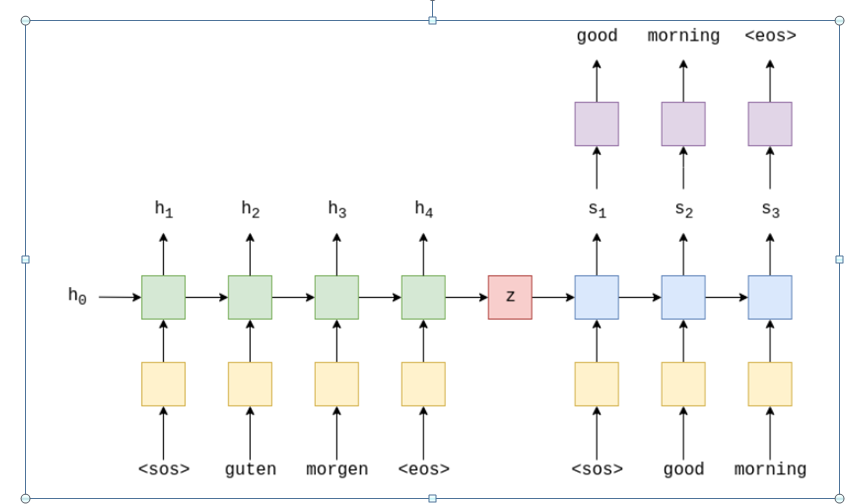

# **1. Encoder**

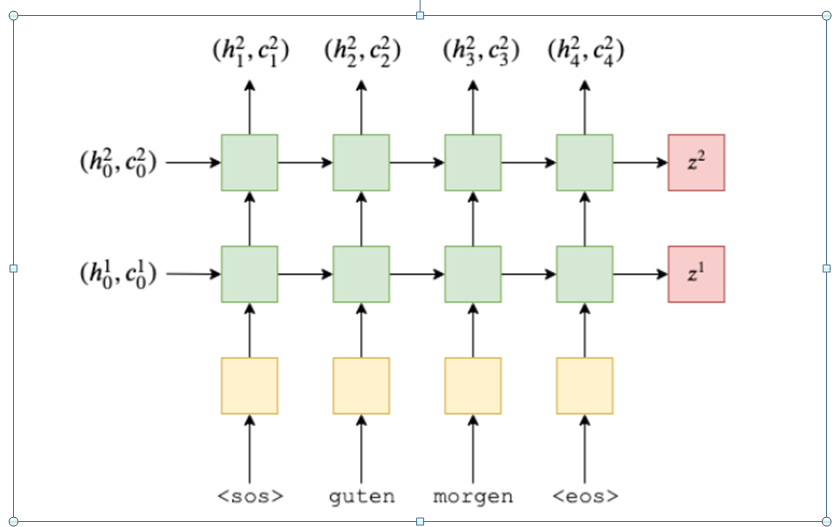

In [64]:
len(de_vocab)

7853

In [65]:
class Encoder(nn.Module):
  def __init__(self,input_dim,embedding_dim,hidden_dim,n_layers,dropout):
    super().__init__()
    self.hidden_dim=hidden_dim
    self.n_layers=n_layers
    self.embedding=nn.Embedding(input_dim,embedding_dim)
    self.lstm=nn.LSTM(embedding_dim,hidden_dim,n_layers,dropout=dropout)
    self.dropout=nn.Dropout(dropout)

  def forward(self, src):
    #src=[src length,batch_size]
    embedded=self.dropout(self.embedding(src))
    #embedded=[src length ,batch size,embedding_dim]
    outputs,(hidden,cell)=self.lstm(embedded)
    #outputs=[src length ,batch size,hidden dim * n directions]
    #hidden=[n layers * n directions ,batch size, hidden dim ]
    #cell=[n layers * n directions,batch size, hidden dim  ]
    return hidden,cell

# **2. decoder**

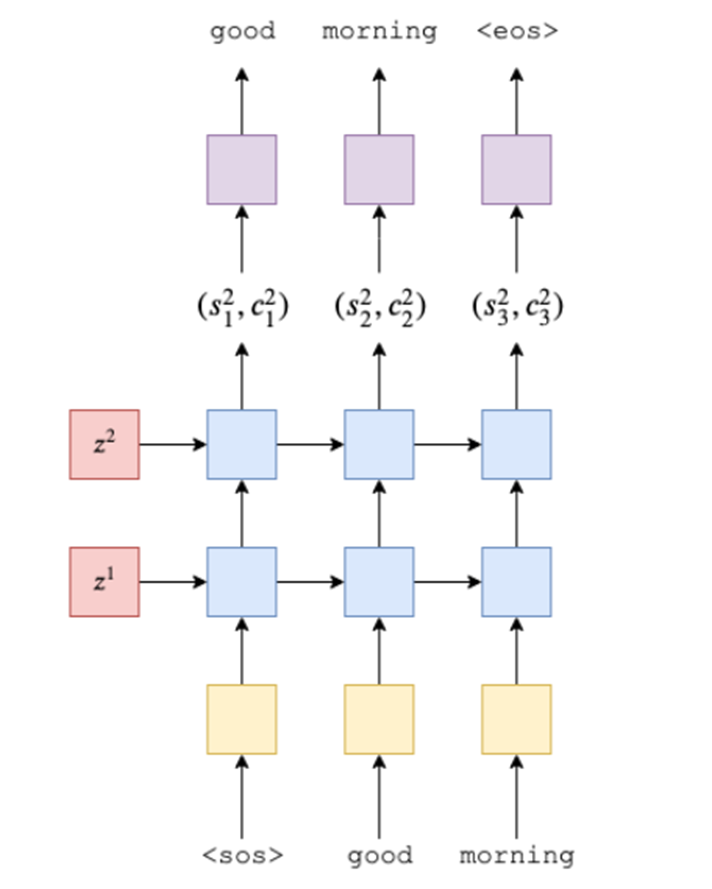

In [66]:
class Decoder(nn.Module):
    def __init__(self, output_dim, embedding_dim, hidden_dim, n_layers, dropout):
        super().__init__()
        self.output_dim = output_dim
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        self.embedding = nn.Embedding(output_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout)
        self.fc_out = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, input, hidden, cell):
        # input = [batch size]
        # hidden = [n layers, batch size, hidden dim]
        # context = [n layers, batch size, hidden dim]
        input = input.unsqueeze(0)
        # input = [1, batch size]
        embedded = self.dropout(self.embedding(input))
        # embedded = [1, batch size, embedding dim]
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))
        # seq length and n directions will always be 1 in this decoder, therefore:
        # output = [1, batch size, hidden dim]
        # hidden = [n layers, batch size, hidden dim]
        # cell = [n layers, batch size, hidden dim]
        prediction = self.fc_out(output.squeeze(0))
        # prediction = [batch size, output dim]
        return prediction, hidden, cell


# **3. Seq2Seq model**

In [67]:
len(en_vocab)

5893

In [68]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        assert (
            encoder.hidden_dim == decoder.hidden_dim
        ), "Hidden dimensions of encoder and decoder must be equal!"
        assert (
            encoder.n_layers == decoder.n_layers
        ), "Encoder and decoder must have equal number of layers!"

    def forward(self, src, trg, teacher_forcing_ratio):
        # src = [src length, batch size] #src sentence
        # trg = [trg length, batch size] #target sentence
        # teacher_forcing_ratio is probability to use teacher forcing
        # e.g. if teacher_forcing_ratio is 0.5 we use ground-truth inputs 50% of the time
        batch_size = trg.shape[1]
        trg_length = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        # tensor to store decoder outputs
        outputs = torch.zeros(trg_length, batch_size, trg_vocab_size).to(self.device)
        # last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden, cell = self.encoder(src)
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        # first input to the decoder is the <sos> tokens
        input = trg[0, :]
        # input = [batch size]
        for t in range(1, trg_length):
            # insert input token embedding, previous hidden and previous cell states
            # receive output tensor (predictions) and new hidden and cell states
            output, hidden, cell = self.decoder(input, hidden, cell)
            # output = [batch size, output dim]
            # hidden = [n layers, batch size, hidden dim]
            # cell = [n layers, batch size, hidden dim]
            # place predictions in a tensor holding predictions for each token
            outputs[t] = output
            # decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            # get the highest predicted token from our predictions
            top1 = output.argmax(1)
            # if teacher forcing, use actual next token as next input
            # if not, use predicted token
            input = trg[t] if teacher_force else top1
            # input = [batch size]
        return outputs

In [69]:
len(en_vocab)

5893

In [70]:
input_dim=len(de_vocab)
output_dim=len(en_vocab)
encoder_embedding_dim=256
decoder_embedding_dim=256
hidden_dim=512
n_layers=2
encoder_dropout=0.5
decoder_dropout=0.5
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder=Encoder(input_dim,encoder_embedding_dim,hidden_dim,n_layers,encoder_dropout,)
decoder=Decoder(output_dim,decoder_embedding_dim,hidden_dim,n_layers,decoder_dropout,)
model=Seq2Seq(encoder,decoder,device).to(device)


 **WEIGHT INITIALIZATION**

**UNIFORM DIsTRIBUTION (-0.08, +0.08)**

In [71]:
def init_weights(m):
  for name,param in m.named_parameters():
    nn.init.uniform_(param.data, -0.08,0.08)
model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(7853, 256)
    (lstm): LSTM(256, 512, num_layers=2, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(5893, 256)
    (lstm): LSTM(256, 512, num_layers=2, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=5893, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [72]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"The Model has {count_parameters(model):,} trainable parametersd")


The Model has 13,898,501 trainable parametersd


# **3.Pick a loss function and optimizer**

In [73]:
optimizer=optim.Adam(model.parameters())
criterion=nn.CrossEntropyLoss(ignore_index=pad_index)

# **4. Training and evaluating function**

# **traning Function**

In [74]:
train_data

Dataset({
    features: ['en', 'de', 'en_tokens', 'de_tokens', 'en_ids', 'de_ids'],
    num_rows: 29000
})

In [75]:
len(train_data_loader)

227

In [76]:
def train_fn(model,data_loader,optimizer,criterion,clip,teacher_forcing_ratio, device):
  model.train()
  epoch_loss=0
  for i, batch in enumerate(data_loader):
    src=batch["de_ids"].to(device)
    #src=[src length , batch size]
    trg=batch["en_ids"].to(device)
    #trg=[trg length ,batch size]
    optimizer.zero_grad()
    output=model(src,trg,teacher_forcing_ratio)
    #output=[trg length , batch size, trg vocab size]
    output_dim=output.shape[-1]
    output=output[1:].view(-1,output_dim)
    #output=[(trg length -1) * batch size ,trg vocab size]
    trg=trg[1:].view(-1)
    loss=criterion(output,trg)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(),clip)
    optimizer.step()
    epoch_loss +=loss.item()
  return epoch_loss / len(data_loader)

# **evaluate function**

In [77]:
def evaluate_fn(model,data_loader,criterion,device):
  model.eval()
  epoch_loss=0
  with torch.no_grad():
    for i,batch in enumerate(data_loader):
      src=batch["de_ids"].to(device)
      trg=batch["en_ids"].to(device)
      output=model(src,trg,0)
      output_dim=output.shape[-1]
      output=output[1:].view(-1,output_dim)
      trg=trg[1:].view(-1)
      loss=criterion(output,trg)
      epoch_loss+=loss.item()
  return epoch_loss / len(data_loader)

In [79]:
n_epochs=10
clip=1.0
teacher_forcing_ratio= 0.5
best_valid_loss=float("inf")
for epoch in tqdm.tqdm(range(n_epochs)):
  train_loss=train_fn(model,train_data_loader,optimizer,criterion,clip,teacher_forcing_ratio,device)
  valid_loss=evaluate_fn(model,valid_data_loader,criterion,device)
  if valid_loss < best_valid_loss:
    best_valid_loss=valid_loss
    torch.save(model.state_dict(),"tut1-model.pt")
  print(f"\tTrain Loss: {train_loss:7.3f} | Train PPL: {np.exp(train_loss):7.3f}")
  print(f"\tValid Loss: {valid_loss:7.3f} | Valid PPL: {np.exp(valid_loss):7.3f}")

 10%|█         | 1/10 [00:49<07:22, 49.13s/it]

	Train Loss:   4.476 | Train PPL:  87.920
	Valid Loss:   4.777 | Valid PPL: 118.723


 20%|██        | 2/10 [01:37<06:27, 48.46s/it]

	Train Loss:   4.148 | Train PPL:  63.288
	Valid Loss:   4.591 | Valid PPL:  98.628


 30%|███       | 3/10 [02:23<05:33, 47.66s/it]

	Train Loss:   3.942 | Train PPL:  51.525
	Valid Loss:   4.414 | Valid PPL:  82.613


 40%|████      | 4/10 [03:11<04:45, 47.60s/it]

	Train Loss:   3.759 | Train PPL:  42.922
	Valid Loss:   4.281 | Valid PPL:  72.337


 50%|█████     | 5/10 [03:58<03:56, 47.34s/it]

	Train Loss:   3.617 | Train PPL:  37.243
	Valid Loss:   4.254 | Valid PPL:  70.370


 60%|██████    | 6/10 [04:45<03:09, 47.26s/it]

	Train Loss:   3.444 | Train PPL:  31.301
	Valid Loss:   4.070 | Valid PPL:  58.569


 70%|███████   | 7/10 [05:32<02:21, 47.13s/it]

	Train Loss:   3.290 | Train PPL:  26.835
	Valid Loss:   3.933 | Valid PPL:  51.071


 80%|████████  | 8/10 [06:19<01:34, 47.27s/it]

	Train Loss:   3.143 | Train PPL:  23.173
	Valid Loss:   3.901 | Valid PPL:  49.445


 90%|█████████ | 9/10 [07:06<00:47, 47.20s/it]

	Train Loss:   2.994 | Train PPL:  19.968
	Valid Loss:   3.793 | Valid PPL:  44.399


100%|██████████| 10/10 [07:53<00:00, 47.40s/it]

	Train Loss:   2.891 | Train PPL:  18.007
	Valid Loss:   3.767 | Valid PPL:  43.262


# **Testing Model**

In [80]:
model.load_state_dict(torch.load("tut1-model.pt"))

test_loss = evaluate_fn(model, test_data_loader, criterion, device)

print(f"| Test Loss: {test_loss:.3f} | Test PPL: {np.exp(test_loss):7.3f} |")

| Test Loss: 3.758 | Test PPL:  42.883 |


# **Blue Score**

In [81]:
def translate_sentence(
    sentence,
    model,
    en_nlp,
    de_nlp,
    en_vocab,
    de_vocab,
    lower,
    sos_token,
    eos_token,
    device,
    max_output_length=25,
):
    model.eval()
    with torch.no_grad():
        if isinstance(sentence, str):
            tokens = [token.text for token in de_nlp.tokenizer(sentence)]
        else:
            tokens = [token for token in sentence]
        if lower:
            tokens = [token.lower() for token in tokens]
        tokens = [sos_token] + tokens + [eos_token]
        ids = de_vocab.lookup_indices(tokens)
        tensor = torch.LongTensor(ids).unsqueeze(-1).to(device)
        hidden, cell = model.encoder(tensor)
        inputs = en_vocab.lookup_indices([sos_token])
        for _ in range(max_output_length):
            inputs_tensor = torch.LongTensor([inputs[-1]]).to(device)
            output, hidden, cell = model.decoder(inputs_tensor, hidden, cell)
            predicted_token = output.argmax(-1).item()
            inputs.append(predicted_token)
            if predicted_token == en_vocab[eos_token]:
                break
        tokens = en_vocab.lookup_tokens(inputs)
    return tokens

In [98]:
test_data[0]["de"]

'Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt.'

In [99]:
test_data[0]["en"]

'A man in an orange hat starring at something.'

In [82]:
sentence = test_data[0]["de"]
expected_translation = test_data[0]["en"]

sentence, expected_translation

('Ein Mann mit einem orangefarbenen Hut, der etwas anstarrt.',
 'A man in an orange hat starring at something.')

In [83]:
translation = translate_sentence(
    sentence,
    model,
    en_nlp,
    de_nlp,
    en_vocab,
    de_vocab,
    lower,
    sos_token,
    eos_token,
    device,
)

In [101]:
test_data[0]["en"]

'A man in an orange hat starring at something.'

In [84]:
translation

['<sos>',
 'a',
 'man',
 'in',
 'a',
 'orange',
 'vest',
 'is',
 'working',
 'on',
 'his',
 '.',
 '.',
 '<eos>']

In [115]:
sentence = "Leute Reparieren das Dach eines Hauses."

In [116]:
translation = translate_sentence(
    sentence,
    model,
    en_nlp,
    de_nlp,
    en_vocab,
    de_vocab,
    lower,
    sos_token,
    eos_token,
    device,
)

In [117]:
translation

['<sos>', 'people', 'on', 'the', 'side', 'of', 'a', 'mountain', '.', '<eos>']

In [111]:
translations = [
    translate_sentence(
        example["de"],
        model,
        en_nlp,
        de_nlp,
        en_vocab,
        de_vocab,
        lower,
        sos_token,
        eos_token,
        device,
    )
    for example in tqdm.tqdm(test_data)
]

100%|██████████| 1000/1000 [00:10<00:00, 95.52it/s]


In [89]:
bleu = evaluate.load("bleu")

In [90]:
predictions = [" ".join(translation[1:-1]) for translation in translations]

references = [[example["en"]] for example in test_data]

In [91]:
predictions[0], references[0]

('a man in a orange vest is working on his . .',
 ['A man in an orange hat starring at something.'])

In [92]:
def get_tokenizer_fn(nlp, lower):
    def tokenizer_fn(s):
        tokens = [token.text for token in nlp.tokenizer(s)]
        if lower:
            tokens = [token.lower() for token in tokens]
        return tokens

    return tokenizer_fn

In [93]:
tokenizer_fn = get_tokenizer_fn(en_nlp, lower)

In [94]:
tokenizer_fn(predictions[0]), tokenizer_fn(references[0][0])

(['a',
  'man',
  'in',
  'a',
  'orange',
  'vest',
  'is',
  'working',
  'on',
  'his',
  '.',
  '.'],
 ['a', 'man', 'in', 'an', 'orange', 'hat', 'starring', 'at', 'something', '.'])

In [95]:
results = bleu.compute(
    predictions=predictions, references=references, tokenizer=tokenizer_fn
)

In [96]:
results

{'bleu': 0.1430313237741989,
 'precisions': [0.5205307961942914,
  0.21717355672919322,
  0.10398717691845322,
  0.05099087063014919],
 'brevity_penalty': 0.9141127386231128,
 'length_ratio': 0.9175984071067544,
 'translation_length': 11982,
 'reference_length': 13058}